In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib import style
from scipy import signal


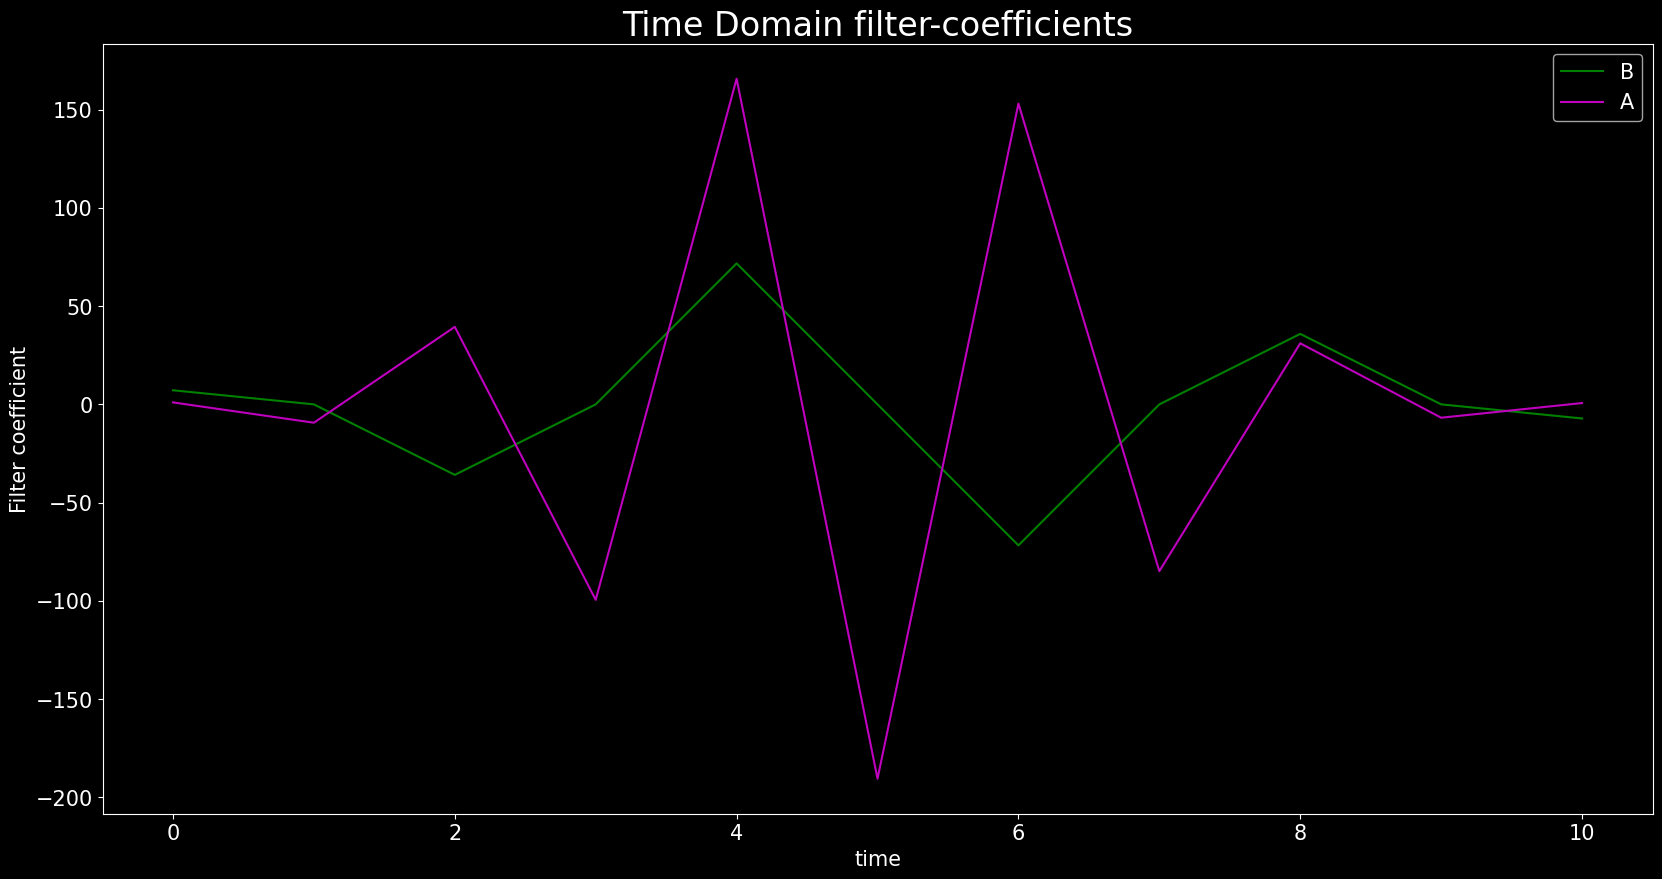

In [31]:
#Bandpass Filter Design
srate=1024
Nyquist=srate/2
cutoff=[30,50]
desired_shape=[0,0,1,1,0,0 ]
desired_frequencies=[0,0,cutoff[0],cutoff[1],0,0]
fcoefsB,fcoefsA=signal.butter(5,np.array(cutoff)/Nyquist,btype='bandpass')
#fcoefsB are the previous values of the Original signal
#fcoefsA is the previous values of the filtered signal
#fcoesfsB are very small as compared to thefcoesfA
#plotting
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(fcoefsB*1e7,'g',label='B')
plt.plot(fcoefsA,'m',label='A')
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter coefficient',fontsize=15)
plt.title('Time Domain filter-coefficients',fontsize=24)
plt.legend(fontsize=15)
plt.show()


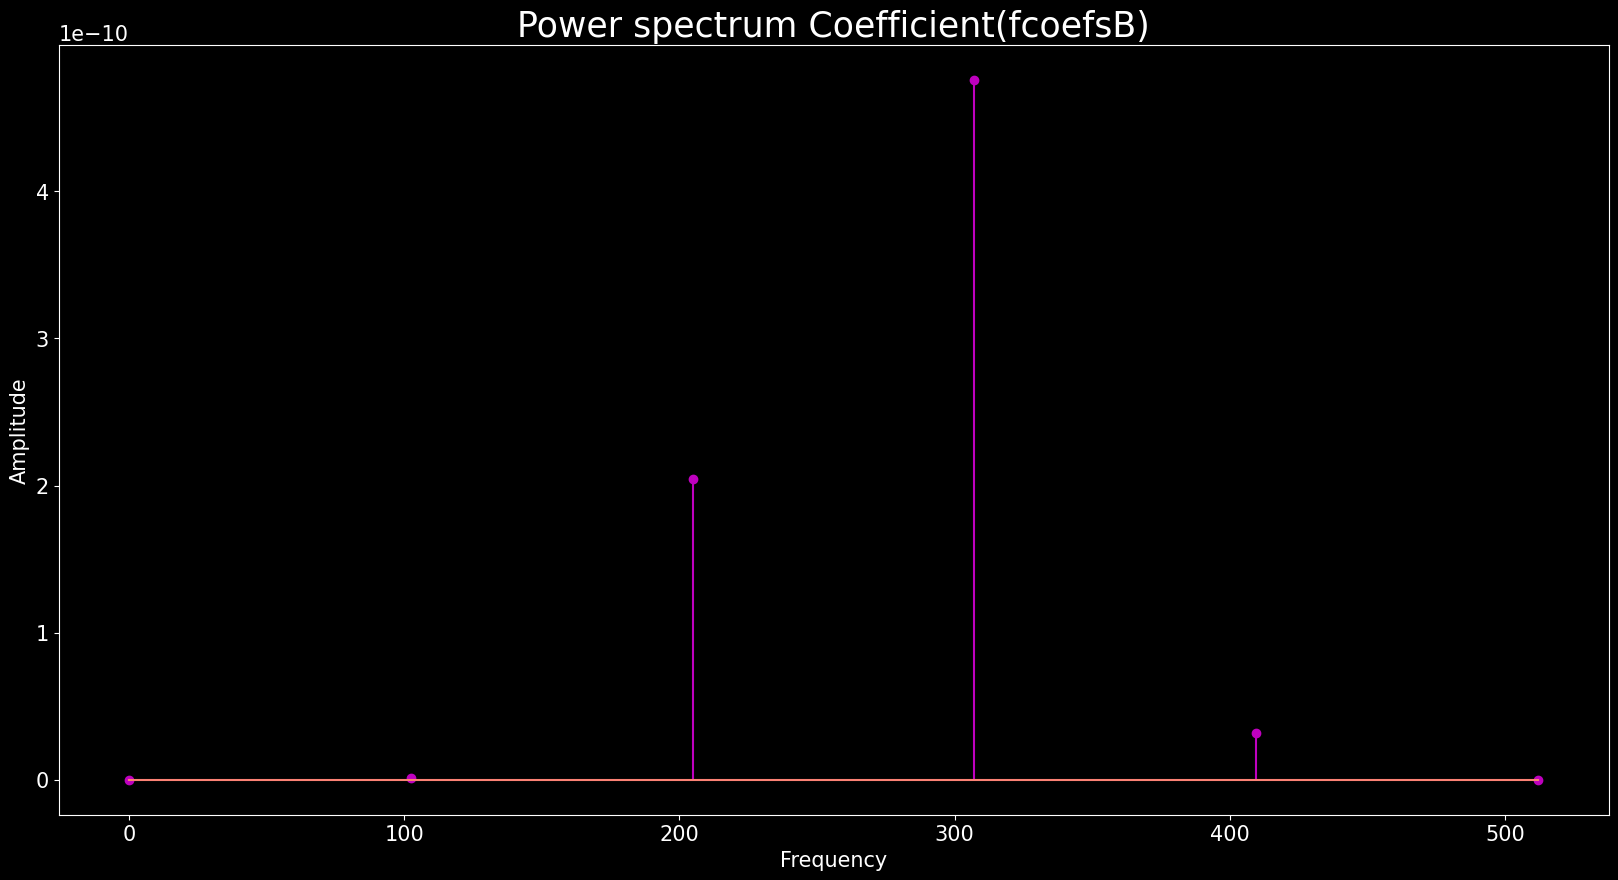

In [21]:
filt_power =np.abs(scipy.fft.fft(fcoefsB))**2
Hz=np.linspace(0,Nyquist,int(np.floor(len(fcoefsB)/2)+1))
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.stem(Hz,filt_power[0:len(Hz)],'ms')
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Power spectrum Coefficient(fcoefsB)',fontsize=25)
plt.show()


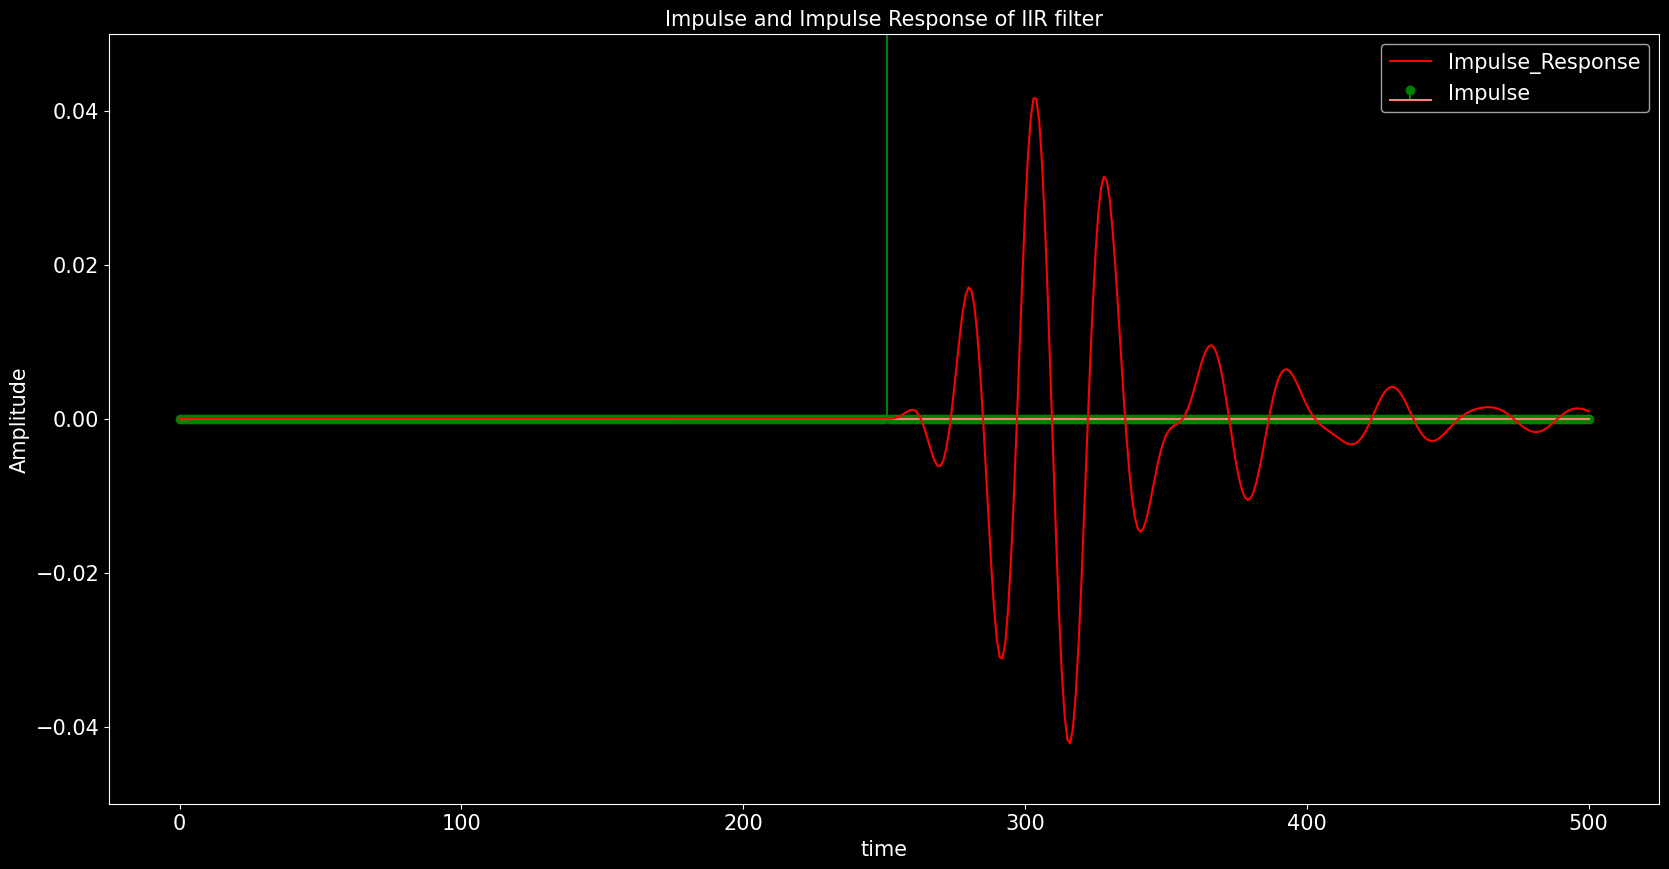

In [33]:
impulse=np.zeros(501)
impulse[251]=1
impulse_res=signal.lfilter(fcoefsB,fcoefsA,impulse)
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.stem(np.arange(0,len(impulse)),impulse,'gs',label='Impulse')
plt.plot(impulse_res,'r',label='Impulse_Response')
plt.ylim([-0.05,0.05])
plt.legend(fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Impulse and Impulse Response of IIR filter',fontsize=15)
plt.show()


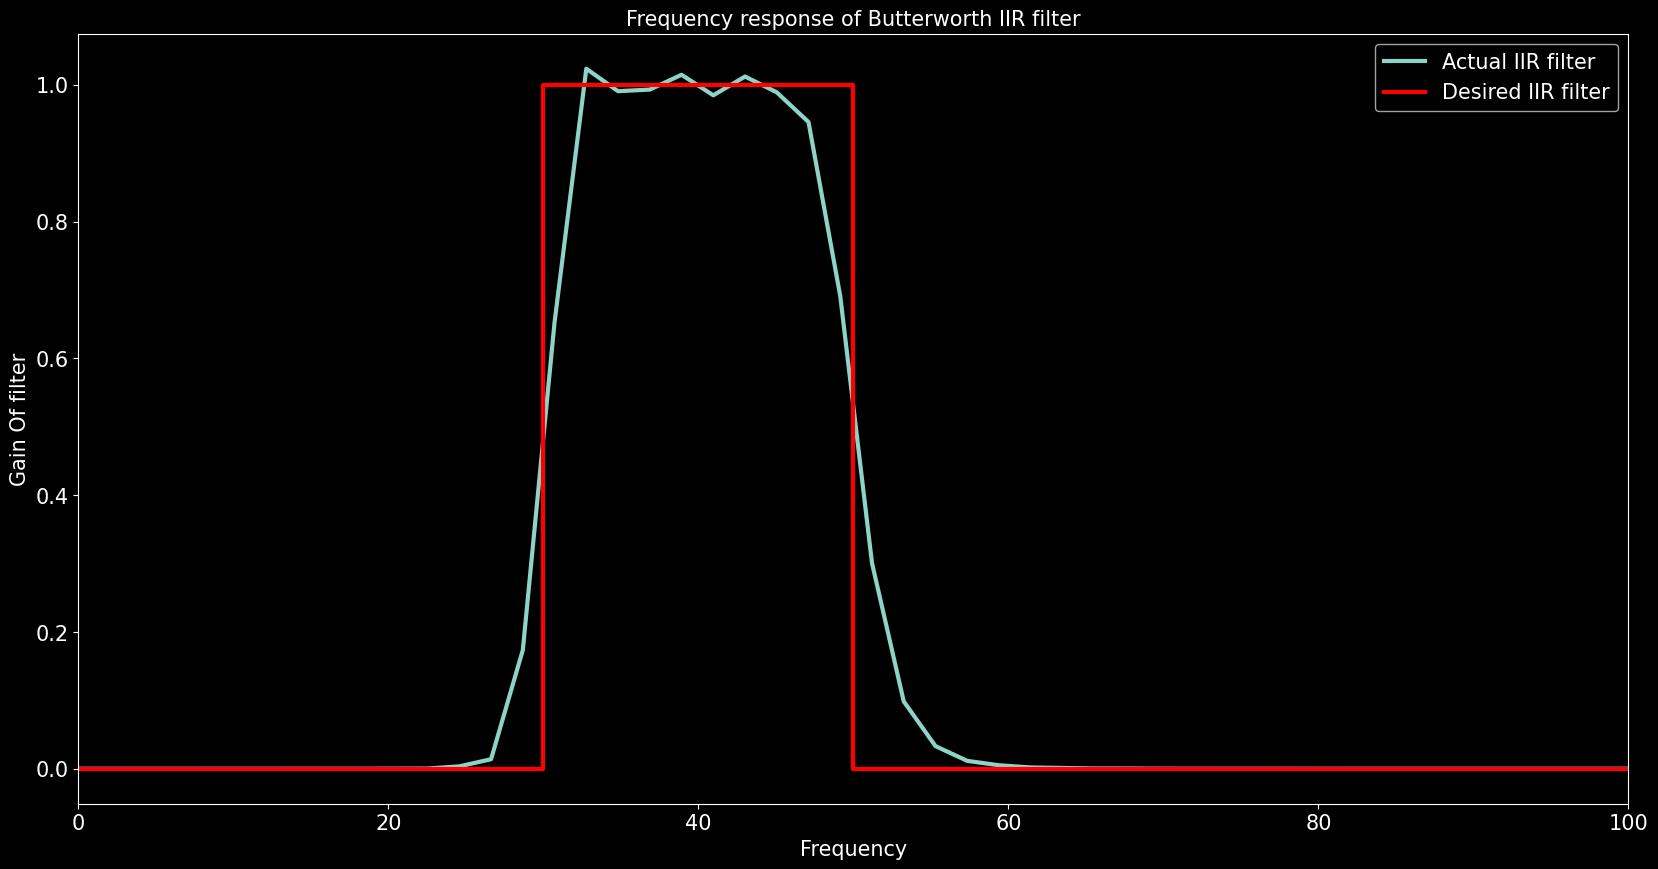

: 

In [ ]:
f_impulse=np.abs(scipy.fft.fft(impulse_res))**2
Hz=np.linspace(0,Nyquist,int(np.floor(len(impulse)/2)+1))
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,f_impulse[0:len(Hz)],linewidth=3,label='Actual IIR filter')
plt.plot([0,cutoff[0],cutoff[0],cutoff[1],cutoff[1],Nyquist],[0,0,1,1,0,0],'r',linewidth=3,label='Desired IIR filter')
plt.xlim([0,100])
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Gain Of filter',fontsize=15)
plt.title('Frequency response of Butterworth IIR filter',fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
#low pass butterworth IIR filter
srate=1024
t=np.arange(0,5,1/srate)
x=40*np.sin(2*np.pi*50*t)
noise=50*np.random.randn(pnts)
Nsignal=x+noise
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(t,Nsignal,'m',label=Noisy-signal)
plt.legend(fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.show()

cutoff=30
fcoefsB,fcoefsA=signal.butter(11,cutoff/Nyquist,btype='low')
impulse=np.zeros(501)
impulse[251]=1
impulse_res=signal.filtfilt(fcoefsB,fcoefsA,impulse)
plt.figure(figsize=(24,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
impulse_time=np.arange(0,len(impulse)/srate)
plt.plot(impulse_time,impulse,'g',linewidth=3,label='Impulse')
plt.plot(impulse_time,impulse_res/np.max(impulse_res),'r',linewidth=3,label='Impulse response')
plt.xlabel('time',fontsize=15)
plt.show()
